<a href="https://colab.research.google.com/github/S-Bhowmick/seo-content-performance-analytics/blob/main/notebooks/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEO & Content Performance Exploration

This notebook explores SEO and content performance data to identify
traffic patterns, conversion efficiency, and optimization opportunities.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [ ]:
df = pd.read_csv("content_data_sample.csv")
df.head()


,date,page_url,title,channel,sessions,clicks,impressions,ctr,avg_position,conversions,time_on_page,bounce_rate
0,2025-12-01,/blog/ai-tools,Best AI Tools for Marketing,organic,1200,180,9200,0.0196,9.8,14,142,0.54
1,2025-12-02,/blog/seo-guide,SEO Guide for Beginners,organic,980,140,7600,0.0184,11.2,10,128,0.57
2,2025-12-03,/blog/email-automation,Email Automation Workflow,email,650,0,0,0.0000,0.0,18,205,0.39
3,2025-12-04,/blog/keyword-research,Keyword Research for 2026,organic,1500,240,11500,0.0209,8.7,21,156,0.51
4,2025-12-05,/blog/landing-page,High Converting Landing Pages,paid,900,75,2100,0.0357,6.3,26,172,0.44


**Dataset Overview**

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6 non-null      object 
 1   page_url      6 non-null      object 
 2   title         6 non-null      object 
 3   channel       6 non-null      object 
 4   sessions      6 non-null      int64  
 5   clicks        6 non-null      int64  
 6   impressions   6 non-null      int64  
 7   ctr           6 non-null      float64
 8   avg_position  6 non-null      float64
 9   conversions   6 non-null      int64  
 10  time_on_page  6 non-null      int64  
 11  bounce_rate   6 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 708.0+ bytes


,sessions,clicks,impressions,ctr,avg_position,conversions,time_on_page,bounce_rate
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1055.000000,132.500000,6533.333333,0.018800,7.683333,17.500000,158.666667,0.495000
std,288.010416,84.246662,4480.922524,0.011354,4.115054,5.576737,26.993826,0.067157
min,650.000000,0.000000,0.000000,0.000000,0.000000,10.000000,128.000000,0.390000
25%,920.000000,91.250000,3475.000000,0.018250,6.900000,14.500000,143.750000,0.457500
50%,1040.000000,150.000000,8200.000000,0.019000,9.250000,17.000000,152.500000,0.515000
75%,1175.000000,175.000000,9100.000000,0.020575,10.025000,20.250000,168.000000,0.535000
max,1500.000000,240.000000,11500.000000,0.035700,11.200000,26.000000,205.000000,0.570000


**Conversion Efficiency**

In [ ]:
df["conversion_rate"] = df["conversions"] / df["sessions"]

df[["title", "sessions", "conversions", "conversion_rate"]] \
    .sort_values(by="conversion_rate", ascending=False)


,title,sessions,conversions,conversion_rate
4,High Converting Landing Pages,900,26,0.028889
2,Email Automation Workflow,650,18,0.027692
5,AI Case Study: Productivity,1100,16,0.014545
3,Keyword Research for 2026,1500,21,0.014000
0,Best AI Tools for Marketing,1200,14,0.011667
1,SEO Guide for Beginners,980,10,0.010204


**Channel Level Performance**

In [ ]:
channel_summary = df.groupby("channel").agg({
    "sessions": "sum",
    "conversions": "sum",
    "conversion_rate": "mean"
}).reset_index()

channel_summary


,channel,sessions,conversions,conversion_rate
0,email,650,18,0.027692
1,organic,4780,61,0.012604
2,paid,900,26,0.028889


**SEO Opportunity Detection**

In [ ]:
seo_opportunities = df[
    (df["impressions"] > df["impressions"].median()) &
    (df["ctr"] < df["ctr"].median())
][["title", "impressions", "ctr", "avg_position"]]

seo_opportunities


,title,impressions,ctr,avg_position
5,AI Case Study: Productivity,8800,0.0182,10.1


**Visuals**

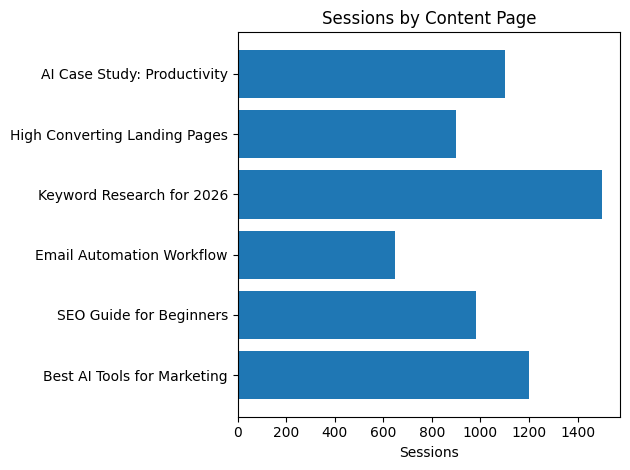

In [ ]:
plt.figure()
plt.barh(df["title"], df["sessions"])
plt.xlabel("Sessions")
plt.title("Sessions by Content Page")
plt.tight_layout()
plt.show()
